<a href="https://colab.research.google.com/github/Belal-AI/Parking-recommendation-system-Autonomous-Vehicle/blob/main/ML_model_Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

**Reading the data set for bikes parking we will use it as real data which has the same features we need in our case ,we will replace it through the time from the real time data**

In [279]:
data=pd.read_csv(r"/content/Edited.csv")
data

,Date,Time,Weather,Parking
0,Monday,0700 - 0715,sunny,Spot A
1,Monday,0715 - 0730,sunny,Spot A
2,Monday,0730 - 0745,sunny,Spot A
3,Monday,0745 - 0800,sunny,Spot A
4,Monday,0800 - 0815,sunny,Spot A
...,...,...,...,...
3195,Tuesday,0745 - 0800,rainy,Spot D
3196,Tuesday,0800 - 0815,rainy,Spot D
3197,Tuesday,0815 - 0830,rainy,Spot D
3198,Tuesday,0830 - 0845,rainy,Spot D


In [280]:
data.isna().sum()

Date       0
Time       0
Weather    0
Parking    0
dtype: int64

**One of the most causes of overfitting and underfitting is the balance of the data with respect to classes ,any machine learning model must be trained by data set balanced between the classes to avoide the biasing  of model**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


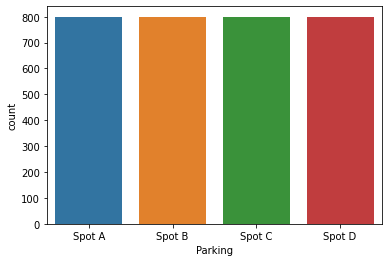

In [281]:
sn.countplot(data['Parking'])

In [282]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     3200 non-null   object
 1   Time     3200 non-null   object
 2   Weather  3200 non-null   object
 3   Parking  3200 non-null   object
dtypes: object(4)
memory usage: 100.1+ KB


**Extract new features of the Time feature**

In [283]:
data[['Start_time','End_time']]=data['Time'].str.split('-',expand=True)

In [284]:
data

,Date,Time,Weather,Parking,Start_time,End_time
0,Monday,0700 - 0715,sunny,Spot A,0700,0715
1,Monday,0715 - 0730,sunny,Spot A,0715,0730
2,Monday,0730 - 0745,sunny,Spot A,0730,0745
3,Monday,0745 - 0800,sunny,Spot A,0745,0800
4,Monday,0800 - 0815,sunny,Spot A,0800,0815
...,...,...,...,...,...,...
3195,Tuesday,0745 - 0800,rainy,Spot D,0745,0800
3196,Tuesday,0800 - 0815,rainy,Spot D,0800,0815
3197,Tuesday,0815 - 0830,rainy,Spot D,0815,0830
3198,Tuesday,0830 - 0845,rainy,Spot D,0830,0845


In [285]:
data['Start_time'].str.split(expand=True,n=4)

,0
0,0700
1,0715
2,0730
3,0745
4,0800
...,...
3195,0745
3196,0800
3197,0815
3198,0830


In [286]:
len(data['Start_time'][0])

5

In [287]:
data['Start_time']

0       0700 
1       0715 
2       0730 
3       0745 
4       0800 
        ...  
3195    0745 
3196    0800 
3197    0815 
3198    0830 
3199    0845 
Name: Start_time, Length: 3200, dtype: object

In [288]:
start_Hour=[]
slice=""
for i in range(len(data['Start_time'])):
  slice=""
  for j in range(2):
    slice=slice+data['Start_time'][i][j]
  start_Hour.append(slice)  
  
  

In [289]:
len(start_Hour)

3200

In [290]:
start_min=[]
slice=""
for i in range(len(data['Start_time'])):
  slice=""
  for j in range(2,4):
    slice=slice+data['Start_time'][i][j]
  start_min.append(slice)
  

In [291]:
len(start_min)

3200

In [292]:
data['End_time'][0]

' 0715'

In [293]:
End_Hour=[]
slice=""
for i in range(len(data['End_time'])):
  slice=""
  for j in range(1,3):
    slice=slice+data['End_time'][i][j]
  End_Hour.append(slice) 
  

In [294]:
end_min=[]
slice=""
for i in range(len(data['End_time'])):
  slice=""
  for j in range(2,4):
    slice=slice+data['End_time'][i][j]
  end_min.append(slice)
  

In [295]:
data['start_Hour']=start_Hour

In [296]:
data['start_min']=start_min

In [297]:
data

,Date,Time,Weather,Parking,Start_time,End_time,start_Hour,start_min
0,Monday,0700 - 0715,sunny,Spot A,0700,0715,07,00
1,Monday,0715 - 0730,sunny,Spot A,0715,0730,07,15
2,Monday,0730 - 0745,sunny,Spot A,0730,0745,07,30
3,Monday,0745 - 0800,sunny,Spot A,0745,0800,07,45
4,Monday,0800 - 0815,sunny,Spot A,0800,0815,08,00
...,...,...,...,...,...,...,...,...
3195,Tuesday,0745 - 0800,rainy,Spot D,0745,0800,07,45
3196,Tuesday,0800 - 0815,rainy,Spot D,0800,0815,08,00
3197,Tuesday,0815 - 0830,rainy,Spot D,0815,0830,08,15
3198,Tuesday,0830 - 0845,rainy,Spot D,0830,0845,08,30


In [298]:
data['end_Hour'],data['end_Min']=End_Hour,end_min

In [299]:
data

,Date,Time,Weather,Parking,Start_time,End_time,start_Hour,start_min,end_Hour,end_Min
0,Monday,0700 - 0715,sunny,Spot A,0700,0715,07,00,07,71
1,Monday,0715 - 0730,sunny,Spot A,0715,0730,07,15,07,73
2,Monday,0730 - 0745,sunny,Spot A,0730,0745,07,30,07,74
3,Monday,0745 - 0800,sunny,Spot A,0745,0800,07,45,08,80
4,Monday,0800 - 0815,sunny,Spot A,0800,0815,08,00,08,81
...,...,...,...,...,...,...,...,...,...,...
3195,Tuesday,0745 - 0800,rainy,Spot D,0745,0800,07,45,08,80
3196,Tuesday,0800 - 0815,rainy,Spot D,0800,0815,08,00,08,81
3197,Tuesday,0815 - 0830,rainy,Spot D,0815,0830,08,15,08,83
3198,Tuesday,0830 - 0845,rainy,Spot D,0830,0845,08,30,08,84


In [300]:
data.drop('Time',axis=1,inplace=True)

In [301]:
data.drop('Start_time',axis=1,inplace=True)
data.drop('End_time',axis=1,inplace=True)

In [302]:
data

,Date,Weather,Parking,start_Hour,start_min,end_Hour,end_Min
0,Monday,sunny,Spot A,07,00,07,71
1,Monday,sunny,Spot A,07,15,07,73
2,Monday,sunny,Spot A,07,30,07,74
3,Monday,sunny,Spot A,07,45,08,80
4,Monday,sunny,Spot A,08,00,08,81
...,...,...,...,...,...,...,...
3195,Tuesday,rainy,Spot D,07,45,08,80
3196,Tuesday,rainy,Spot D,08,00,08,81
3197,Tuesday,rainy,Spot D,08,15,08,83
3198,Tuesday,rainy,Spot D,08,30,08,84


In [303]:
start_H=data['start_Hour'].str.split('0',expand=True)
data['start_Hour']=start_H.iloc[:,1]

In [304]:
end_h=data['end_Hour'].str.split('0',expand=True)
data['end_Hour']=end_h.iloc[:,1]

In [305]:
data

,Date,Weather,Parking,start_Hour,start_min,end_Hour,end_Min
0,Monday,sunny,Spot A,7,00,7,71
1,Monday,sunny,Spot A,7,15,7,73
2,Monday,sunny,Spot A,7,30,7,74
3,Monday,sunny,Spot A,7,45,8,80
4,Monday,sunny,Spot A,8,00,8,81
...,...,...,...,...,...,...,...
3195,Tuesday,rainy,Spot D,7,45,8,80
3196,Tuesday,rainy,Spot D,8,00,8,81
3197,Tuesday,rainy,Spot D,8,15,8,83
3198,Tuesday,rainy,Spot D,8,30,8,84


In [306]:
data['start_min']=data['start_min'].replace({'00':'0'})

In [307]:
data['end_Min']=data['end_Min'].replace({'00':'0'})

In [308]:
data['target']=data['Parking']

In [309]:
data.drop('Parking',axis=1,inplace=True)

In [310]:
data

,Date,Weather,start_Hour,start_min,end_Hour,end_Min,target
0,Monday,sunny,7,0,7,71,Spot A
1,Monday,sunny,7,15,7,73,Spot A
2,Monday,sunny,7,30,7,74,Spot A
3,Monday,sunny,7,45,8,80,Spot A
4,Monday,sunny,8,0,8,81,Spot A
...,...,...,...,...,...,...,...
3195,Tuesday,rainy,7,45,8,80,Spot D
3196,Tuesday,rainy,8,0,8,81,Spot D
3197,Tuesday,rainy,8,15,8,83,Spot D
3198,Tuesday,rainy,8,30,8,84,Spot D


**convert the Data type ---------Object->int32**

In [311]:
data['start_Hour']=np.int32(data['start_Hour'])


In [312]:
data['start_min']=np.int32(data['start_min'])
data['end_Hour']=np.int32(data['end_Hour'])
data['end_Min']=np.int32(data['end_Min'])


In [313]:
data

,Date,Weather,start_Hour,start_min,end_Hour,end_Min,target
0,Monday,sunny,7,0,7,71,Spot A
1,Monday,sunny,7,15,7,73,Spot A
2,Monday,sunny,7,30,7,74,Spot A
3,Monday,sunny,7,45,8,80,Spot A
4,Monday,sunny,8,0,8,81,Spot A
...,...,...,...,...,...,...,...
3195,Tuesday,rainy,7,45,8,80,Spot D
3196,Tuesday,rainy,8,0,8,81,Spot D
3197,Tuesday,rainy,8,15,8,83,Spot D
3198,Tuesday,rainy,8,30,8,84,Spot D


In [314]:
data

,Date,Weather,start_Hour,start_min,end_Hour,end_Min,target
0,Monday,sunny,7,0,7,71,Spot A
1,Monday,sunny,7,15,7,73,Spot A
2,Monday,sunny,7,30,7,74,Spot A
3,Monday,sunny,7,45,8,80,Spot A
4,Monday,sunny,8,0,8,81,Spot A
...,...,...,...,...,...,...,...
3195,Tuesday,rainy,7,45,8,80,Spot D
3196,Tuesday,rainy,8,0,8,81,Spot D
3197,Tuesday,rainy,8,15,8,83,Spot D
3198,Tuesday,rainy,8,30,8,84,Spot D


In [315]:
data=data.iloc[:,:-1]
target=data.iloc[:,-1]

In [316]:
data

,Date,Weather,start_Hour,start_min,end_Hour,end_Min
0,Monday,sunny,7,0,7,71
1,Monday,sunny,7,15,7,73
2,Monday,sunny,7,30,7,74
3,Monday,sunny,7,45,8,80
4,Monday,sunny,8,0,8,81
...,...,...,...,...,...,...
3195,Tuesday,rainy,7,45,8,80
3196,Tuesday,rainy,8,0,8,81
3197,Tuesday,rainy,8,15,8,83
3198,Tuesday,rainy,8,30,8,84


**Hot-Encoding our data**

In [317]:
data=pd.get_dummies(data=data,drop_first=True)

In [318]:
data

,start_Hour,start_min,end_Hour,end_Min,Date_Monday,Date_Saturday,Date_Sunday,Date_Thursday,Date_Tuesday,Date_Wednesday,Weather_rainy,Weather_sunny
0,7,0,7,71,1,0,0,0,0,0,0,1
1,7,15,7,73,1,0,0,0,0,0,0,1
2,7,30,7,74,1,0,0,0,0,0,0,1
3,7,45,8,80,1,0,0,0,0,0,0,1
4,8,0,8,81,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3195,7,45,8,80,0,0,0,0,1,0,1,0
3196,8,0,8,81,0,0,0,0,1,0,1,0
3197,8,15,8,83,0,0,0,0,1,0,1,0
3198,8,30,8,84,0,0,0,0,1,0,1,0


In [319]:
data['target']=target
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   start_Hour      3200 non-null   int32
 1   start_min       3200 non-null   int32
 2   end_Hour        3200 non-null   int32
 3   end_Min         3200 non-null   int32
 4   Date_Monday     3200 non-null   uint8
 5   Date_Saturday   3200 non-null   uint8
 6   Date_Sunday     3200 non-null   uint8
 7   Date_Thursday   3200 non-null   uint8
 8   Date_Tuesday    3200 non-null   uint8
 9   Date_Wednesday  3200 non-null   uint8
 10  Weather_rainy   3200 non-null   uint8
 11  Weather_sunny   3200 non-null   uint8
 12  target          3200 non-null   int32
dtypes: int32(5), uint8(8)
memory usage: 87.6 KB


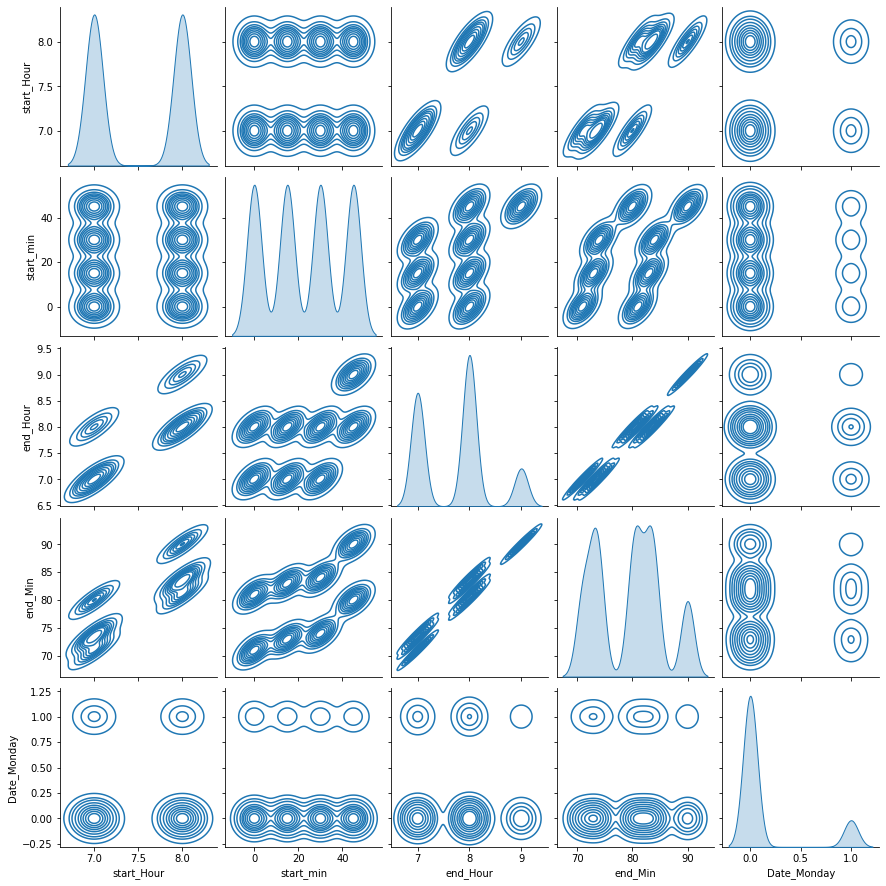

In [320]:
sn.pairplot(data=data.iloc[:,:5],kind="kde")

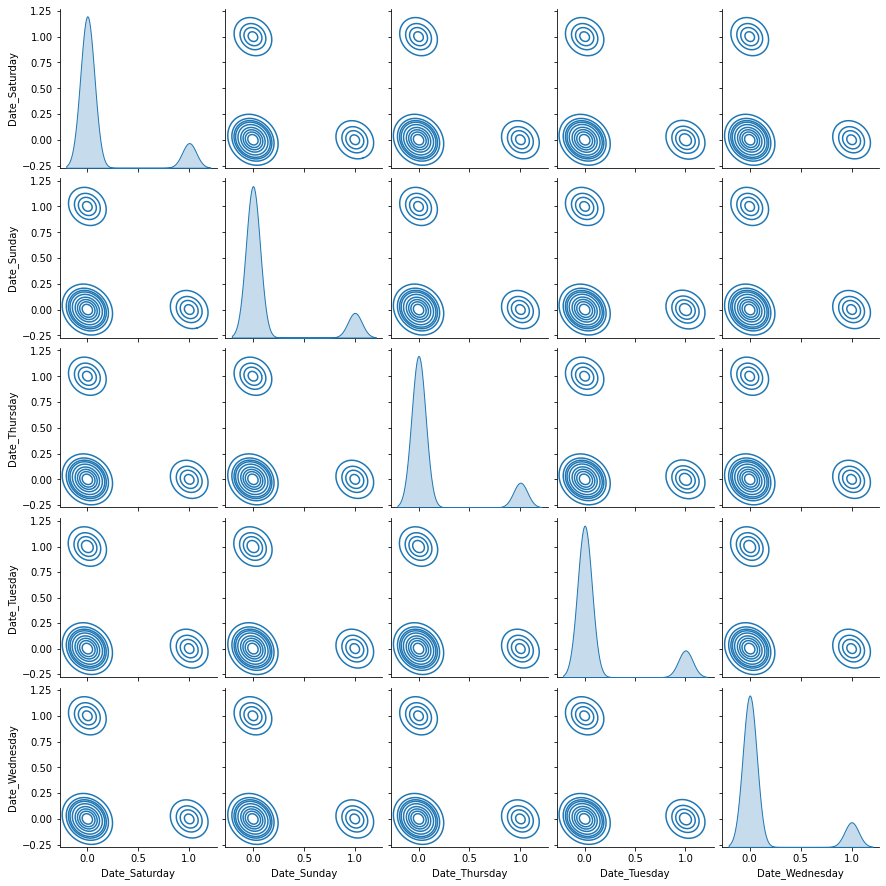

In [321]:
sn.pairplot(data=data.iloc[:,5:10],kind="kde")

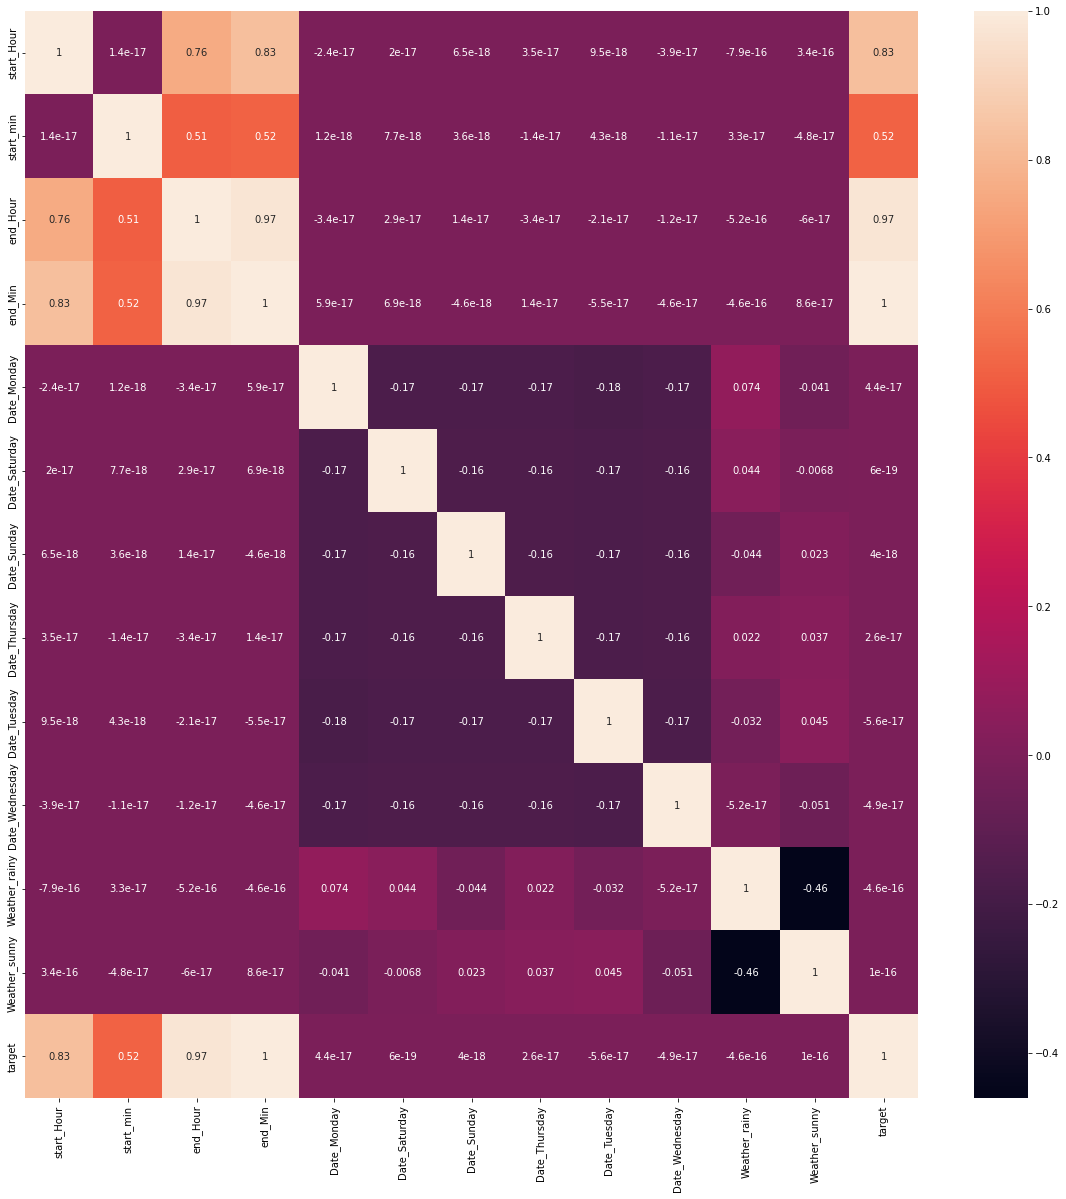

In [322]:
corr=data.corr()
plt.figure(figsize=(20,20))
sn.heatmap(data=corr,annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

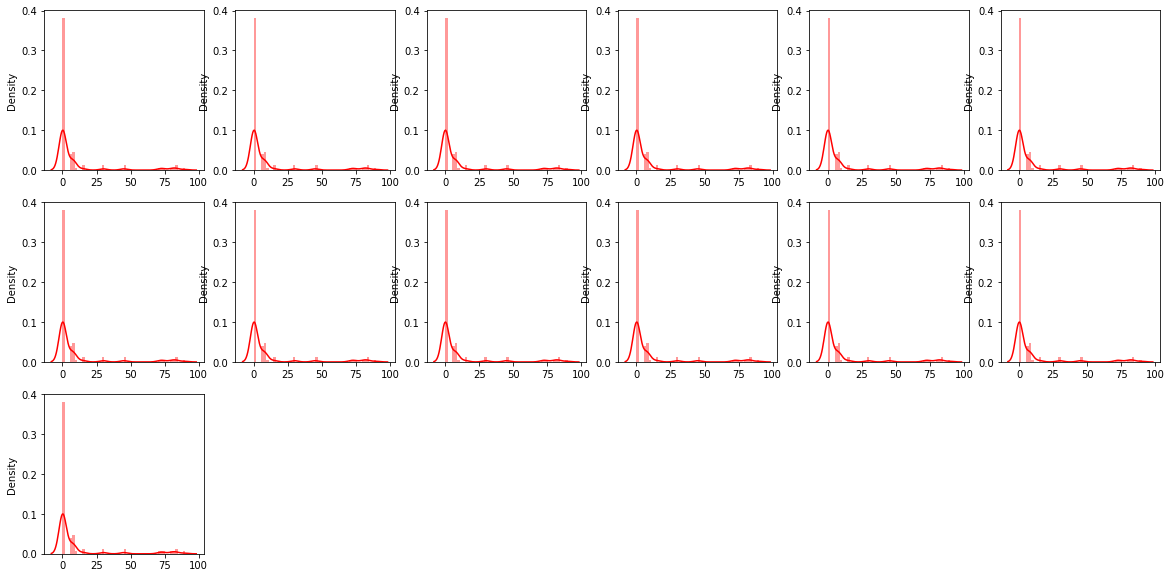

In [323]:
j = 0
plt.figure(figsize=(20,10))
for i in data:
  plt.subplot(3,6,j+1)
  sn.distplot(data.iloc[:,:-1],label=i,color='r')
  j+=1

In [324]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
target=encoder.fit_transform(data['target'])
target=target.reshape(-1,1)
data['target']=target
data

,start_Hour,start_min,end_Hour,end_Min,Date_Monday,Date_Saturday,Date_Sunday,Date_Thursday,Date_Tuesday,Date_Wednesday,Weather_rainy,Weather_sunny,target
0,7,0,7,71,1,0,0,0,0,0,0,1,0
1,7,15,7,73,1,0,0,0,0,0,0,1,1
2,7,30,7,74,1,0,0,0,0,0,0,1,2
3,7,45,8,80,1,0,0,0,0,0,0,1,3
4,8,0,8,81,1,0,0,0,0,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,7,45,8,80,0,0,0,0,1,0,1,0,3
3196,8,0,8,81,0,0,0,0,1,0,1,0,4
3197,8,15,8,83,0,0,0,0,1,0,1,0,5
3198,8,30,8,84,0,0,0,0,1,0,1,0,6


In [343]:
import statsmodels.regression.linear_model as sm
columns=data.iloc[:,:-1].columns
sl=.02
def backwordelimination(X,y,sl,columns,lenfeatures):
  for i in range(len(X)):
    regressor=sm.OLS(y,X).fit()
    maxpvalu=max(regressor.pvalues)
    if(maxpvalu>sl):
      for j in range(len(columns)):
        if(regressor.pvalues[j]==maxpvalu):
          np.delete(X,j,1)
          columns=np.delete(columns,j)
  return X,columns


In [344]:
X,columns=backwordelimination(data.iloc[:,:-1].values,data.iloc[:,-1].values,sl,columns,len(columns))

In [345]:
columns

Index(['start_Hour', 'start_min', 'end_Hour', 'end_Min', 'Date_Monday',
       'Date_Saturday', 'Date_Sunday', 'Date_Thursday', 'Date_Tuesday',
       'Date_Wednesday', 'Weather_rainy', 'Weather_sunny'],
      dtype='object')

In [348]:
data=pd.DataFrame(data=X,columns=columns)
data

,start_Hour,start_min,end_Hour,end_Min,Date_Monday,Date_Saturday,Date_Sunday,Date_Thursday,Date_Tuesday,Date_Wednesday,Weather_rainy,Weather_sunny
0,7,0,7,71,1,0,0,0,0,0,0,1
1,7,15,7,73,1,0,0,0,0,0,0,1
2,7,30,7,74,1,0,0,0,0,0,0,1
3,7,45,8,80,1,0,0,0,0,0,0,1
4,8,0,8,81,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3195,7,45,8,80,0,0,0,0,1,0,1,0
3196,8,0,8,81,0,0,0,0,1,0,1,0
3197,8,15,8,83,0,0,0,0,1,0,1,0
3198,8,30,8,84,0,0,0,0,1,0,1,0


In [349]:
data['target']=target

In [350]:
data

,start_Hour,start_min,end_Hour,end_Min,Date_Monday,Date_Saturday,Date_Sunday,Date_Thursday,Date_Tuesday,Date_Wednesday,Weather_rainy,Weather_sunny,target
0,7,0,7,71,1,0,0,0,0,0,0,1,0
1,7,15,7,73,1,0,0,0,0,0,0,1,1
2,7,30,7,74,1,0,0,0,0,0,0,1,2
3,7,45,8,80,1,0,0,0,0,0,0,1,3
4,8,0,8,81,1,0,0,0,0,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,7,45,8,80,0,0,0,0,1,0,1,0,3
3196,8,0,8,81,0,0,0,0,1,0,1,0,4
3197,8,15,8,83,0,0,0,0,1,0,1,0,5
3198,8,30,8,84,0,0,0,0,1,0,1,0,6
